<a href="https://colab.research.google.com/github/Krishika510/terrainClassification/blob/master/NN_C1_Final_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
# Importing google drive and mounting the drive.

from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [29]:
# Importing all the necessary modules.

import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM, Activation, InputLayer
from keras.optimizers import Adam
from sklearn.utils import class_weight
# from keras import backend as K
from sklearn.preprocessing import StandardScaler
from keras.utils import to_categorical
from collections import Counter
from keras import utils as np_utils
from keras.utils.vis_utils import plot_model
import matplotlib.pyplot as plt
# import tensorflow as tf

scaler = StandardScaler()

In [28]:
#Splitting given files into training, test and validation dataset.

X_files = ['subject_001_01__x.csv', 'subject_001_02__x.csv', 
           'subject_001_03__x.csv', 'subject_001_04__x.csv',
           'subject_001_06__x.csv',
           'subject_001_07__x.csv', 'subject_001_08__x.csv',
           'subject_002_01__x.csv', 'subject_002_02__x.csv',
           'subject_002_03__x.csv',
           'subject_002_05__x.csv', 'subject_003_01__x.csv',
           'subject_005_02__x.csv',
           'subject_005_03__x.csv', 'subject_006_01__x.csv',
           'subject_006_02__x.csv', 'subject_006_03__x.csv',
           'subject_007_01__x.csv',
           'subject_007_03__x.csv', 'subject_007_04__x.csv',
           'subject_008_01__x.csv']

X_test_files = ['subject_001_05__x.csv','subject_005_01__x.csv']
X_val_files = ['subject_007_02__x.csv','subject_002_04__x.csv']

y_files = ['subject_001_01__y.csv', 'subject_001_02__y.csv', 
           'subject_001_03__y.csv', 'subject_001_04__y.csv',
           'subject_001_06__y.csv',
           'subject_001_07__y.csv', 'subject_001_08__y.csv',
           'subject_002_01__y.csv', 'subject_002_02__y.csv',
           'subject_002_03__y.csv',
           'subject_002_05__y.csv', 'subject_003_01__y.csv',
           'subject_005_02__y.csv',
           'subject_005_03__y.csv', 'subject_006_01__y.csv',
           'subject_006_02__y.csv', 'subject_006_03__y.csv',
           'subject_007_01__y.csv',
           'subject_007_03__y.csv', 'subject_007_04__y.csv',
           'subject_008_01__y.csv']

y_test_files = ['subject_001_05__y.csv', 'subject_005_01__y.csv']
y_val_files = ['subject_007_02__y.csv',  'subject_002_04__y.csv']


In [21]:
%cd '/content/gdrive/MyDrive/data/'

/content/gdrive/MyDrive/data


In [27]:
# Defining variables for training dataset.
final_x_train= []
final_y_train=[]

# Defining variables for validation dataset.
final_x_val = []
final_y_val = []

#Defining variables for test dataset.
final_x_test = []
final_y_test =[]

In [24]:
# Mode function to find highest occurrent label in a window.

def mode(a, axis=0):
    scores = np.unique(np.ravel(a))
    testshape = list(a.shape)
    testshape[axis] = 1
    oldmostfreq = np.zeros(testshape)
    oldcounts = np.zeros(testshape)

    for score in scores:
        template = (a == score)
        counts = np.expand_dims(np.sum(template, axis),axis)
        mostfrequent = np.where(counts > oldcounts, score, oldmostfreq)
        oldcounts = np.maximum(counts, oldcounts)
        oldmostfreq = mostfrequent

    return mostfrequent, oldcounts

In [25]:
# Preprocessing the training data.

for i in range(len(y_files)):
  X_df = pd.read_csv(X_files[i])
  y_df = pd.read_csv(y_files[i])
  a=[]
  for i in range(0, len(y_df)):
    a+=[y_df['0'][i]] * 4
  upsampled_df = pd.DataFrame(a)
  diff = X_df.shape[0] - upsampled_df.shape[0]
  X_df = X_df.iloc[:-diff,:]

  sc=StandardScaler()
  X_df=sc.fit_transform(X_df)

  x_arr=[]
  y_arr=[]

  for j in range(len(X_df)-30):
            window=30
            df = X_df[j].copy()
            df_len = len(df)
            x_arr.append(X_df[j:(j+window)]) 
            y_arr.append(mode(upsampled_df.iloc[j:(j+window)])[0])
  final_x_train.append(np.array(x_arr))
  final_y_train.append(np.array(y_arr).reshape(-1,1))

trainX, trainY = np.concatenate(final_x_train), np.concatenate(final_y_train)

In [30]:
# Preprocessing the validation data.

for i in range(len(y_val_files)):
  X_df = pd.read_csv(X_val_files[i])
  y_df = pd.read_csv(y_val_files[i])
  a=[]
  for i in range(0, len(y_df)):
    a+=[y_df['0'][i]] * 4
  upsampled_df = pd.DataFrame(a)
  diff = X_df.shape[0] - upsampled_df.shape[0]
  X_df = X_df.iloc[:-diff,:]

  sc=StandardScaler()
  X_df=sc.fit_transform(X_df)

  x_arr=[]
  y_arr=[]

  for j in range(len(X_df)-30):
            window=30
            df = X_df[j].copy()
            df_len = len(df)
            x_arr.append(X_df[j:(j+window)]) 
            y_arr.append(mode(upsampled_df.iloc[j:(j+window)])[0])
  final_x_val.append(np.array(x_arr))
  final_y_val.append(np.array(y_arr).reshape(-1,1))

valX, valY = np.concatenate(final_x_val), np.concatenate(final_y_val)

In [31]:
# Preprocessing the test data.

for i in range(len(y_test_files)):
  X_df = pd.read_csv(X_test_files[i])
  y_df = pd.read_csv(y_test_files[i])
  a=[]
  for i in range(0, len(y_df)):
    a+=[y_df['0'][i]] * 4
  upsampled_df = pd.DataFrame(a)
  diff = X_df.shape[0] - upsampled_df.shape[0]
  X_df = X_df.iloc[:-diff,:]

  sc=StandardScaler()
  X_df=sc.fit_transform(X_df)

  x_arr=[]
  y_arr=[]

  for j in range(len(X_df)-30):
            window=30
            df = X_df[j].copy()
            df_len = len(df)
            x_arr.append(X_df[j:(j+window)]) 
            y_arr.append(mode(upsampled_df.iloc[j:(j+window)])[0])
  final_x_test.append(np.array(x_arr))
  final_y_test.append(np.array(y_arr).reshape(-1,1))

testX, testY = np.concatenate(final_x_test), np.concatenate(final_y_test)

In [32]:
# Weighing classes to support the data imbalance.

from sklearn.utils import class_weight

label_weights = class_weight.compute_class_weight('balanced', np.unique(trainY), trainY.ravel())
print(label_weights)
label_weights = {i:label_weights[i] for i in range(len(label_weights))} # Create dictionary
print(label_weights)

[0.33743318 6.08652052 4.65799658 1.52098606]
{0: 0.33743317764132047, 1: 6.08652052238806, 2: 4.657996580811212, 3: 1.520986056326796}


In [33]:
# One hot encoding of y labels.

hot_y_train = np_utils.to_categorical(trainY)
hot_y_val = np_utils.to_categorical(valY)
hot_y_test = np_utils.to_categorical(testY)

In [34]:
# Defining the LSTM model.

timestep, features, n_outputs = trainX.shape[1], trainX.shape[2] , hot_y_train.shape[1]
model_LSTM = Sequential()
model_LSTM.add(InputLayer(input_shape=(timestep, features)))
model_LSTM.add(LSTM(units=125, activation='relu'))
model_LSTM.add(Dropout(0.5))
model_LSTM.add(Dense(units = 125, activation = 'relu'))
model_LSTM.add(Dense(n_outputs, activation='softmax')) # output layer
model_LSTM.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

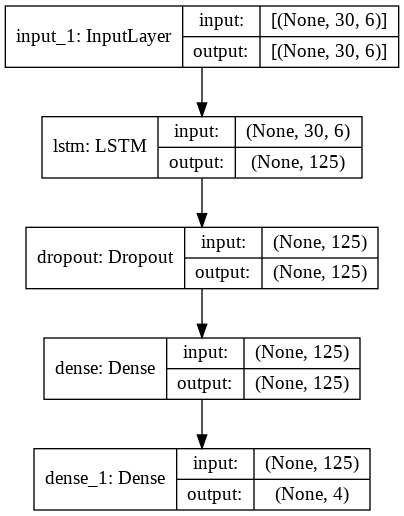

In [35]:
# Plotting the LSTM model layers.

plot_model(model_LSTM, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
#Fitting the model with dataset created and saving in the variable history.

history = model_LSTM.fit(trainX, hot_y_train, epochs = 10, batch_size = 256,
                   validation_data = (valX, hot_y_val), class_weight = label_weights,
                   verbose = 1, shuffle = True)

Epoch 1/10
2433/3875 [=================>............] - ETA: 2:40 - loss: 0.5721 - accuracy: 0.6279

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


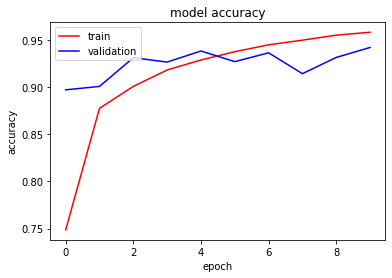

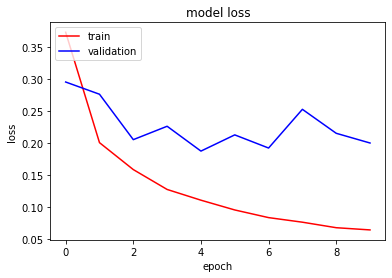

In [ ]:
# Summarize history for accuracy
plt.plot(history.history['accuracy'], color='red')
plt.plot(history.history['val_accuracy'], color='blue')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

# Summarize history for loss
plt.plot(history.history['loss'], color='red')
plt.plot(history.history['val_loss'], color='blue')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
# Generating the classification report on test dataset.

from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

y_pred = model_LSTM.predict(testX, batch_size = 256, verbose = 1)
y_test_bool = np.argmax(y_pred, axis = 1)
print(classification_report(testY, y_test_bool))

450/450 [==============================] - 21s 46ms/step
              precision    recall  f1-score   support

         0.0       0.97      0.94      0.96     90937
         1.0       0.83      0.97      0.90      6247
         2.0       0.82      0.98      0.89      9171
         3.0       0.77      0.74      0.75      8777

    accuracy                           0.93    115132
   macro avg       0.85      0.91      0.87    115132
weighted avg       0.94      0.93      0.93    115132



In [ ]:
# Navigating to prediction dataset folder.

%cd '/content/gdrive/MyDrive/dataV/'

/content/gdrive/My Drive


In [ ]:
# Predicting for Subject 9.

input_data = pd.read_csv('subject_009_01__x.csv')
df=sc.fit_transform(input_data)
y_frame = pd.read_csv('subject_009_01__y_time.csv')
addl_rows = y_frame.shape[0] * 4 - df.shape[0] + 30
addl_rows_df = pd.DataFrame(df[-addl_rows:])
df = pd.DataFrame(df)
df = df.append(addl_rows_df)
X_values = []
for i in range(0, len(df) - 30, 1):
    value = df.iloc[i:(i + 30)].values
    X_values.append(value)
X_test = np.array(X_values)
y_test = model_LSTM.predict(X_test, batch_size = 64, verbose = 1)
y_test_class = np.argmax(y_test, axis = 1)
output_actual = []
for i in range(0, y_test_class.shape[0], 4):
    a = list(y_test_class[i:i + 4])
    output_actual.append(max(a, key = a.count))
y_actual = np.array(output_actual)
print(y_actual.size)
y_series = pd.Series(y_actual)

y_series.to_csv('subject_009_01__y_prediction.csv') 
files.download('subject_009_01__y_prediction.csv')

594/594 [==============================] - 10s 18ms/step
9497


In [ ]:
#Predicting for Subject 10.

input_data = pd.read_csv('subject_010_01__x.csv')
df=sc.fit_transform(input_data)
y_frame = pd.read_csv('subject_010_01__y_time.csv')
addl_rows = y_frame.shape[0] * 4 - df.shape[0] + 30
addl_rows_df = pd.DataFrame(df[-addl_rows:])
df = pd.DataFrame(df)
df = df.append(addl_rows_df)
X_values = []
for i in range(0, len(df) - 30, 1):
    value = df.iloc[i:(i + 30)].values
    X_values.append(value)
X_test = np.array(X_values)
y_test = model_LSTM.predict(X_test, batch_size = 64, verbose = 1)
y_test_class = np.argmax(y_test, axis = 1)
output_actual = []
for i in range(0, y_test_class.shape[0], 4):
    a = list(y_test_bool[i:i + 4])
    output_actual.append(max(a, key = a.count))
y_actual = np.array(output_actual)
print(y_actual.size)
y_series = pd.Series(y_actual)

y_series.to_csv('subject_010_01__y_prediction.csv') 
files.download('subject_010_01__y_prediction.csv')

767/767 [==============================] - 14s 18ms/step
12269


In [ ]:
#Predicting for Subject 11.

input_data = pd.read_csv('subject_011_01__x.csv')
df=sc.fit_transform(input_data)
y_frame = pd.read_csv('subject_011_01__y_time.csv')
addl_rows = y_frame.shape[0] * 4 - df.shape[0] + 30
addl_rows_df = pd.DataFrame(df[-addl_rows:])
df = pd.DataFrame(df)
df = df.append(addl_rows_df)
X_values = []
for i in range(0, len(df) - 30, 1):
    value = df.iloc[i:(i + 30)].values
    X_values.append(value)
X_test = np.array(X_values)
y_test = model_LSTM.predict(X_test, batch_size = 64, verbose = 1)
y_test_class = np.argmax(y_test, axis = 1)
output_actual = []
for i in range(0, y_test_class.shape[0], 4):
    a = list(y_test_class[i:i + 4])
    output_actual.append(max(a, key = a.count))
y_actual = np.array(output_actual)
print(y_actual.size)
y_series = pd.Series(y_actual)

y_series.to_csv('subject_011_01__y_prediction.csv') 
files.download('subject_011_01__y_prediction.csv')

809/809 [==============================] - 14s 18ms/step
12939


In [ ]:
#Predicting for Subject 12.

input_data = pd.read_csv('subject_012_01__x.csv')
df=sc.fit_transform(input_data)
y_frame = pd.read_csv('subject_012_01__y_time.csv')
addl_rows = y_frame.shape[0] * 4 - df.shape[0] + 30
addl_rows_df = pd.DataFrame(df[-addl_rows:])
df = pd.DataFrame(df)
df = df.append(addl_rows_df)
X_values = []
for i in range(0, len(df) - 30, 1):
    value = df.iloc[i:(i + 30)].values
    X_values.append(value)
X_test = np.array(X_values)
y_test = model_LSTM.predict(X_test, batch_size = 64, verbose = 1)
y_test_class = np.argmax(y_test, axis = 1)
output_actual = []
for i in range(0, y_test_class.shape[0], 4):
    a = list(y_test_class[i:i + 4])
    output_actual.append(max(a, key = a.count))
y_actual = np.array(output_actual)
print(y_actual.size)
y_series = pd.Series(y_actual)

y_series.to_csv('subject_012_01__y_prediction.csv') 
files.download('subject_012_01__y_prediction.csv')

709/709 [==============================] - 13s 18ms/step
11329
